In [2]:
%%capture
%pip install pymc3 nfl-data-py

In [4]:
import nfl_data_py as nfl
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import arviz as az
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

random = np.random.default_rng(42)

plt.style.use('ggplot')

In [5]:
sanders_carries_ou = 13.5
line = -108

In [6]:
def implied_probability(money_line, round_n=2):
  if money_line < 0:
    return round(money_line / (money_line - 100), round_n)
  else:
    return round(1 - (money_line / (money_line + 100)), round_n)

ip_x = implied_probability(line)  
print(f'Implied probability of over {sanders_carries_ou} carries for M. Sanders in the Super Bowl is: ', ip_x)

Implied probability of over 13.5 carries for M. Sanders in the Super Bowl is:  0.52


In [7]:
nfl.see_weekly_cols()

Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'recent_team', 'season', 'week',
       'season_type', 'completions', 'attempts', 'passing_yards',
       'passing_tds', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions',
       'racr', 'target_share', 'air_yards_share', 'wopr', 'special_teams_tds',
       'fantasy_points', 'fantasy_point

In [8]:
weekly_data = nfl.import_weekly_data(years=range(2019, 2023), columns=['player_name', 'carries'])
sanders_carries = weekly_data.loc[weekly_data['player_name'] == 'M.Sanders'].carries.values

sanders_carries

Downcasting floats.


array([11, 10, 13, 11,  9,  3,  6,  3, 10, 11, 12, 17, 15, 19, 20,  9, 14,
       20, 18, 13, 11,  9, 15, 16,  6, 10, 14, 17, 15, 15, 13,  2,  7, 11,
        9,  6, 16,  9, 24, 18,  7,  7, 13, 17, 15, 27, 15, 18,  9, 17, 12,
       13, 21, 10, 17, 11, 21, 12, 11, 17, 11], dtype=int32)

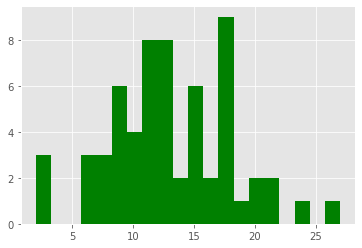

In [11]:
plt.hist(sanders_carries, color="green", bins=20);

In [10]:
print('Sample size: ', len(sanders_carries))
print('Mean: ', sanders_carries.mean())
print('Median: ', np.median(sanders_carries))
print('Mode: ', st.mode(sanders_carries)[0][0])
print('Standard deviation: ', sanders_carries.std())

Sample size:  61
Mean:  12.918032786885245
Median:  13.0
Mode:  11
Standard deviation:  5.018964304261349


In [ ]:
xs = np.array([])
n_simulations = 10_000

for _ in range(n_simulations):
    boot_x = np.random.choice(sanders_carries, size=len(sanders_carries), replace=True).mean()
    xs =  np.append(xs, boot_x)

In [ ]:
xs

array([12.60655738, 12.57377049, 13.01639344, ..., 12.55737705,
       13.03278689, 12.62295082])

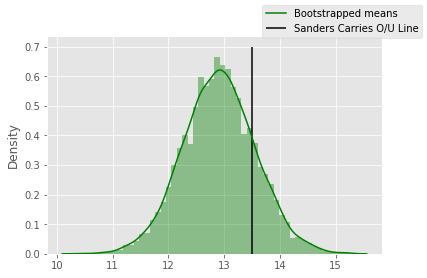

In [ ]:
sns.distplot(xs, color='green');
plt.gca().vlines(x=sanders_carries_ou, ymin=0, ymax=0.7, color='black');
plt.gcf().legend(['Bootstrapped means', 'Sanders Carries O/U Line']);

In [ ]:
lower_bound, upper_bound = np.quantile(xs, 0.05), np.quantile(xs, 0.95)
lower_bound, upper_bound

(11.852459016393443, 13.98360655737705)

In [ ]:
poisson_arr = np.random.poisson(lam=sanders_carries.mean(), size=n_simulations)

calculated_probability = sum(poisson_arr > sanders_carries_ou) / n_simulations
print(calculated_probability)
if calculated_probability > ip_x:
  print('Take the over')
else:
  print('Take the under')

0.4158
Take the under
